In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
# 한글 처리를 위한 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# csv 파일 로딩
df = pd.read_csv('../data/wine/wine_new.csv')

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality  class  
0      9.0        3      0  
1      8.4        3      0  

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

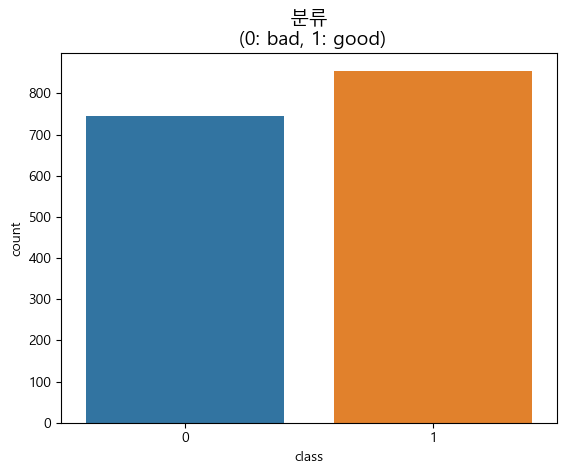

In [3]:
# 데이터의 컬럼명 변경
print(df.head())
import seaborn as sns
sns.countplot('class', data=df)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [6]:
# 불균형 데이터셋
train_cols = df.columns[0:11] # 0~10 필드
print(train_cols)
X = df[train_cols]
y = df['class']
# y = df['quality']
print(df[train_cols].head())
print(y.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n(0: bad, 1: good)')

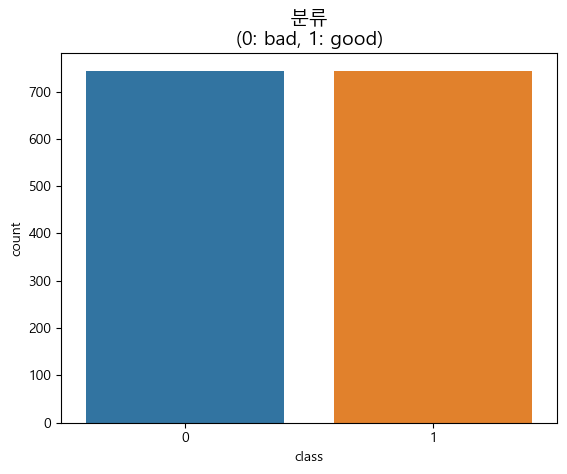

In [7]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data = X_sample, columns=train_cols)
y_samp = pd.DataFrame(data = y_sample, columns=['class'])
# y_samp = pd.DataFrame(data = y_sample, columns=['quality'])
df2 = pd.concat([X_samp, y_samp], axis = 1)

import seaborn as sns
sns.countplot('class', data=df2)
# sns.countplot('quality', data=df2)
plt.title('분류\n(0: bad, 1: good)', fontsize=14)

In [8]:
train_cols = df.columns[0:11]
X = X_samp[train_cols]
y = y_samp['class']
# y = y_samp['quality']

In [9]:
import statsmodels.api as sm
model = sm.Logit(y, X)
result = model.fit()
print(result.summary2())
# 모델의 설명력 25%
# 유의하지 않은 변수들 확인
# fixed acidity, residual sugar, pH
# 상관관계 : density(-) > chlorides(-) > volatile acidity(-) > sulphates(+)
#             도수      >   염화물     >    휘발성 산도       >  황산염

Optimization terminated successfully.
         Current function value: 0.517020
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.254      
Dependent Variable:  class             AIC:               1560.6514  
Date:                2023-04-03 12:07  BIC:               1619.0085  
No. Observations:    1488              Log-Likelihood:    -769.33    
Df Model:            10                LL-Null:           -1031.4    
Df Residuals:        1477              LLR p-value:       3.0299e-106
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.0980   0.0652  1.5015 0.1332  -0.0299  0.2258
volatile acidity

In [10]:
# pvalue가 0.05보다 큰 값들을 제거
cols = ['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = X_samp[cols]
y = y_samp['class']
# y = y_samp['quality']
df2 = pd.concat([X, y], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000) # max_iter=1000 횟수를 지정해주면 경고메시지가 사라짐
model.fit(X_train, y_train)
print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.7453781512605042
검증용 :  0.7483221476510067


In [12]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[122,  39],
       [ 36, 101]], dtype=int64)

In [13]:
df_cm=pd.DataFrame(cm, index=[0, 1],
columns=[0, 1])
df_cm

,0,1
0,122,39
1,36,101


<AxesSubplot:title={'center':'Confusion Matrix'}>

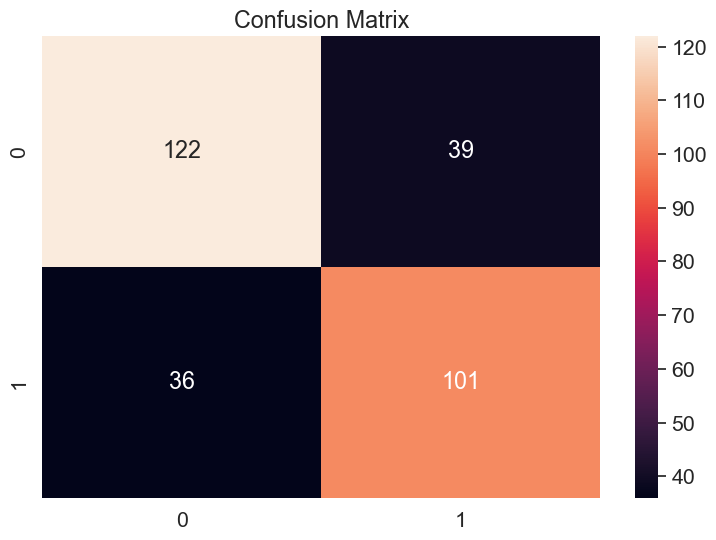

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자